# TP 3

## Importaciones generales y cargo de csv's

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

## Modelo 2 - GradientBoostingClassifier

### Cargo los archivos ya encodeados

In [2]:
df_train = pd.read_csv("df_train_encodeado_completo (3).csv")
#df_test = pd.read_csv("df_test_encoding_completo.csv")

In [3]:
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543134,3530134,0,14327565,917.81,12544,321.00,150.00,226.00,184.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543135,3530135,0,14327595,26.95,12598,111.00,150.00,166.00,310.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543136,3530136,0,14327620,117.00,11919,170.00,150.00,224.00,204.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543137,3530137,0,14327620,102.00,12449,174.00,150.00,117.00,143.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
for i in df_train.columns: 
    promedio = 100*df_train[i].isnull().sum()/len(df_train[i])
    if (promedio > 0):
        print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna C1 tiene 0.00018411493190509243 % de elementos nulos
La columna C2 tiene 0.00018411493190509243 % de elementos nulos
La columna C3 tiene 0.00018411493190509243 % de elementos nulos
La columna C4 tiene 0.00018411493190509243 % de elementos nulos
La columna C5 tiene 0.00018411493190509243 % de elementos nulos
La columna C6 tiene 0.00018411493190509243 % de elementos nulos
La columna C7 tiene 0.00018411493190509243 % de elementos nulos
La columna C8 tiene 0.00018411493190509243 % de elementos nulos
La columna C9 tiene 0.00018411493190509243 % de elementos nulos
La columna C10 tiene 0.00018411493190509243 % de elementos nulos
La columna C11 tiene 0.00018411493190509243 % de elementos nulos
La columna C12 tiene 0.00018411493190509243 % de elementos nulos
La columna C13 tiene 0.00018411493190509243 % de elementos nulos
La columna C14 tiene 0.00018411493190509243 % de elementos nulos
La columna D1 tiene 0.00018411493190509243 % de elementos nulos
La columna D2 tiene 0.0001841149319

In [5]:
df_train.fillna(0, inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543134,3530134,0,14327565,917.81,12544,321.00,150.00,226.00,184.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543135,3530135,0,14327595,26.95,12598,111.00,150.00,166.00,310.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543136,3530136,0,14327620,117.00,11919,170.00,150.00,224.00,204.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543137,3530137,0,14327620,102.00,12449,174.00,150.00,117.00,143.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
columnas = list(df_train.columns)
columnas;

In [7]:
columnas_sin_isFraud = columnas
columnas_sin_isFraud.remove('isFraud')
columnas_sin_isFraud;

In [8]:
columnas_sin_isFraud_y_sin_TransactionID = columnas_sin_isFraud
columnas_sin_isFraud_y_sin_TransactionID.remove('TransactionID')
columnas_sin_isFraud_y_sin_TransactionID;

### Entrenamiento

In [9]:
import numpy as np
import math
from tqdm import tqdm
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold

from sklearn.ensemble import GradientBoostingClassifier

from tqdm import tqdm

In [10]:
points = df_train[columnas_sin_isFraud_y_sin_TransactionID].values
points

array([[8.6400000e+04, 6.8500000e+01, 1.3926000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6401000e+04, 2.9000000e+01, 2.7550000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6469000e+04, 5.9000000e+01, 4.6630000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4327620e+07, 1.1700000e+02, 1.1919000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4327620e+07, 1.0200000e+02, 1.2449000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4327647e+07, 1.7100000e+02, 8.3200000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [11]:
points.size/495

566181.2606060606

In [12]:
labels = df_train['isFraud'].values
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Separo en train y validation

In [13]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.3, random_state = 0)

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.5)

In [15]:
X_train

array([[6.5261270e+06, 4.7950000e+01, 9.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6338840e+06, 2.5419000e+01, 9.0260000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2085851e+07, 5.9000000e+01, 7.9740000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3078680e+06, 7.6023000e+01, 1.4037000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1032606e+07, 3.3100000e+02, 4.4360000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5920600e+06, 4.7950000e+01, 1.7640000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [16]:
X_train.shape

(380197, 516)

In [17]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
y_train.shape

(380197,)

In [19]:
X_test

array([[1.3032888e+07, 1.1040000e+03, 1.6659000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3410120e+06, 4.7950000e+01, 1.2797000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0783470e+06, 1.2995000e+02, 9.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7141590e+06, 1.7100000e+02, 6.8680000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2785550e+06, 5.9000000e+01, 1.7188000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.5653570e+06, 3.0000000e+02, 9.8030000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [20]:
X_test.shape

(162942, 516)

In [21]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
y_test.shape

(162942,)

In [58]:
gb_model_1 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=0, verbose=100)

In [59]:
gb_model_1.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.3567           16.76m
         2          43.2802           16.21m
         3          43.3036           15.93m
         4         594.3605           15.57m
         5         594.3603           15.15m
         6         851.6548           14.83m
         7         851.6398           14.54m
         8         851.6061           14.24m
         9    16984320.6862           13.88m
        10    16984320.6825           13.54m
        11    16984320.6807           13.19m
        12    16984313.9951           12.86m
        13    16984313.9922           12.50m
        14    16984313.9898           12.18m
        15    16984314.0102           11.85m
        16 21708335509323423358076469263728640.0000           11.46m
        17 21708335509323423358076469263728640.0000           11.10m
        18 21708335509323423358076469263728640.0000           10.78m
        19 21708335509323423358076469263728640.0000           10.46m
   

GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=0,
                           verbose=100)

In [60]:
print(classification_report(y_train, gb_model_1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    366968
           1       0.70      0.36      0.48     13229

    accuracy                           0.97    380197
   macro avg       0.84      0.68      0.73    380197
weighted avg       0.97      0.97      0.97    380197



In [61]:
roc_auc_score(y_train, gb_model_1.predict_proba(X_train)[:,1])

0.8343790323807677

In [62]:
print(classification_report(y_test, gb_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    157339
           1       0.66      0.35      0.46      5603

    accuracy                           0.97    162942
   macro avg       0.82      0.67      0.72    162942
weighted avg       0.97      0.97      0.97    162942



In [63]:
roc_auc_score(y_test, gb_model_1.predict_proba(X_test)[:,1])

0.824068956932796

In [64]:
importance = gb_model_1.feature_importances_
importance

array([7.46219722e-04, 2.46217018e-03, 2.23511950e-04, 6.28262043e-03,
       1.01015904e-02, 1.50346152e-13, 4.75693282e-03, 3.14549214e-06,
       0.00000000e+00, 9.26176406e-04, 7.45478290e-03, 1.29699518e-03,
       7.26382023e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.16178696e-02, 1.06035094e-03,
       0.00000000e+00, 1.36628064e-02, 3.89381508e-03, 1.69225708e-03,
       1.13453780e-01, 2.26706967e-02, 0.00000000e+00, 2.76350763e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76497156e-03,
       0.00000000e+00, 1.28518222e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [74]:
len(importance)

516

In [75]:
puntajes_de_las_columnas = {}
count = 1

# summarize feature importance
for i,v in enumerate(importance):
    print(count, ' - Columna', columnas_sin_isFraud_y_sin_TransactionID[i], '  -  Score: %.5f' % (v))
    #puntajes_de_las_columnas.append((columnas_sin_isFraud_y_sin_TransactionID[i], v))
    #puntajes_de_las_columnas.update({v: columnas_sin_isFraud_y_sin_TransactionID[i]})
    puntajes_de_las_columnas.update({columnas_sin_isFraud_y_sin_TransactionID[i] : v})
    
    count = count+1

1  - Columna TransactionDT   -  Score: 0.00075
2  - Columna TransactionAmt   -  Score: 0.00246
3  - Columna card1   -  Score: 0.00022
4  - Columna card2   -  Score: 0.00628
5  - Columna card3   -  Score: 0.01010
6  - Columna card5   -  Score: 0.00000
7  - Columna addr1   -  Score: 0.00476
8  - Columna addr2   -  Score: 0.00000
9  - Columna dist1   -  Score: 0.00000
10  - Columna dist2   -  Score: 0.00093
11  - Columna P_emaildomain   -  Score: 0.00745
12  - Columna R_emaildomain   -  Score: 0.00130
13  - Columna C1   -  Score: 0.07264
14  - Columna C2   -  Score: 0.00000
15  - Columna C3   -  Score: 0.00000
16  - Columna C4   -  Score: 0.00000
17  - Columna C5   -  Score: 0.00000
18  - Columna C6   -  Score: 0.00000
19  - Columna C7   -  Score: 0.06162
20  - Columna C8   -  Score: 0.00106
21  - Columna C9   -  Score: 0.00000
22  - Columna C10   -  Score: 0.01366
23  - Columna C11   -  Score: 0.00389
24  - Columna C12   -  Score: 0.00169
25  - Columna C13   -  Score: 0.11345
26  - Colum

In [76]:
puntajes_de_las_columnas

{'TransactionDT': 0.0007462197224349861,
 'TransactionAmt': 0.0024621701774052134,
 'card1': 0.00022351194977417112,
 'card2': 0.0062826204261361195,
 'card3': 0.010101590388362105,
 'card5': 1.50346152310334e-13,
 'addr1': 0.004756932820647849,
 'addr2': 3.1454921433224224e-06,
 'dist1': 0.0,
 'dist2': 0.0009261764058142925,
 'P_emaildomain': 0.007454782900907739,
 'R_emaildomain': 0.0012969951831260861,
 'C1': 0.07263820231144406,
 'C2': 0.0,
 'C3': 0.0,
 'C4': 0.0,
 'C5': 0.0,
 'C6': 0.0,
 'C7': 0.06161786959832209,
 'C8': 0.0010603509350438306,
 'C9': 0.0,
 'C10': 0.013662806441317772,
 'C11': 0.003893815079113688,
 'C12': 0.0016922570763452651,
 'C13': 0.11345377977118275,
 'C14': 0.02267069669651455,
 'D1': 0.0,
 'D2': 0.00027635076250867466,
 'D3': 0.0,
 'D4': 0.0,
 'D5': 0.0,
 'D6': 0.0017649715617613184,
 'D7': 0.0,
 'D8': 0.0012851822242095916,
 'D9': 0.0,
 'D10': 0.0,
 'D11': 0.0,
 'D12': 0.0,
 'D13': 0.0,
 'D14': 0.0,
 'D15': 0.0,
 'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 

In [77]:
len(puntajes_de_las_columnas.keys())

516

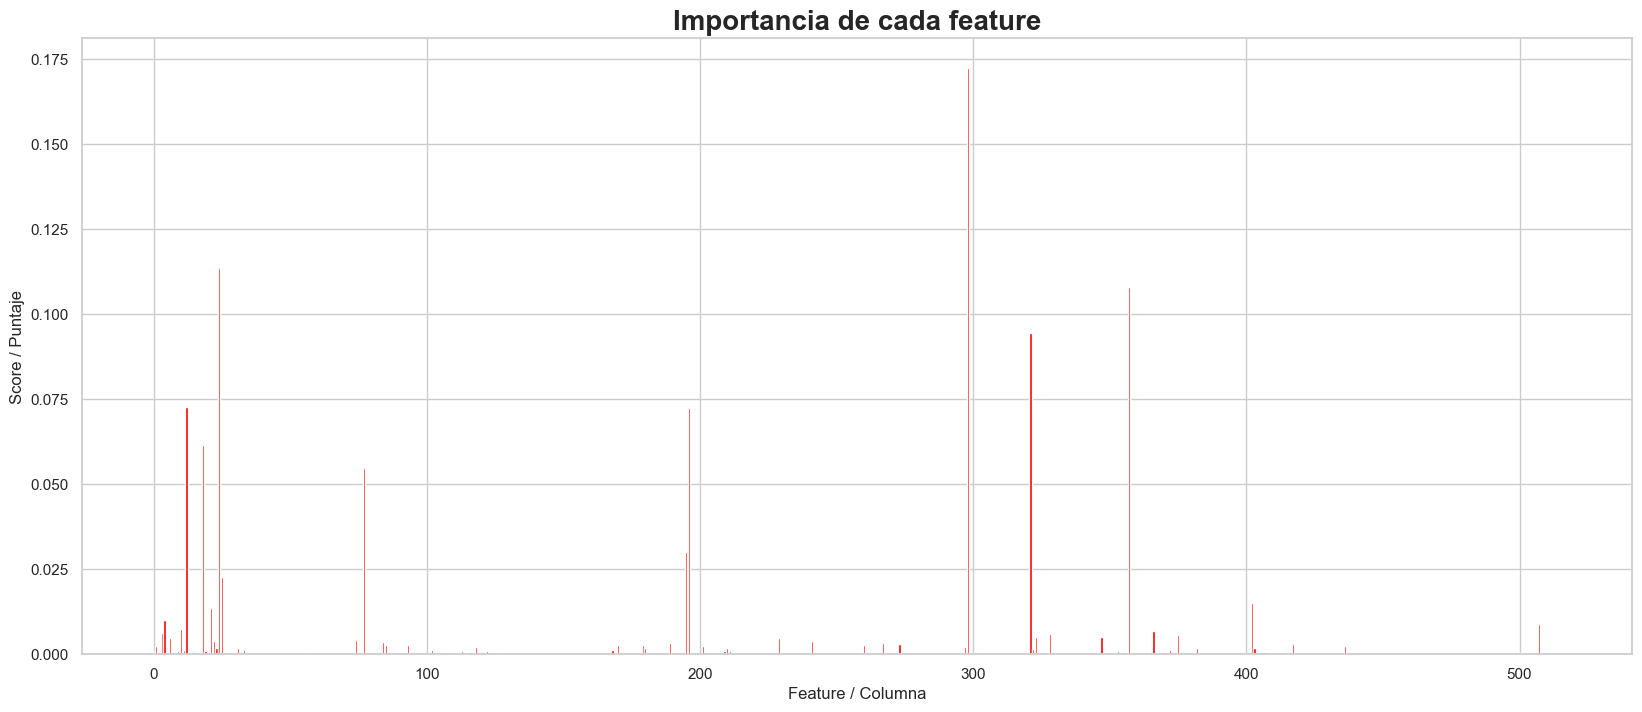

In [78]:
# plot feature importance
fig = plt.figure(figsize = (20, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

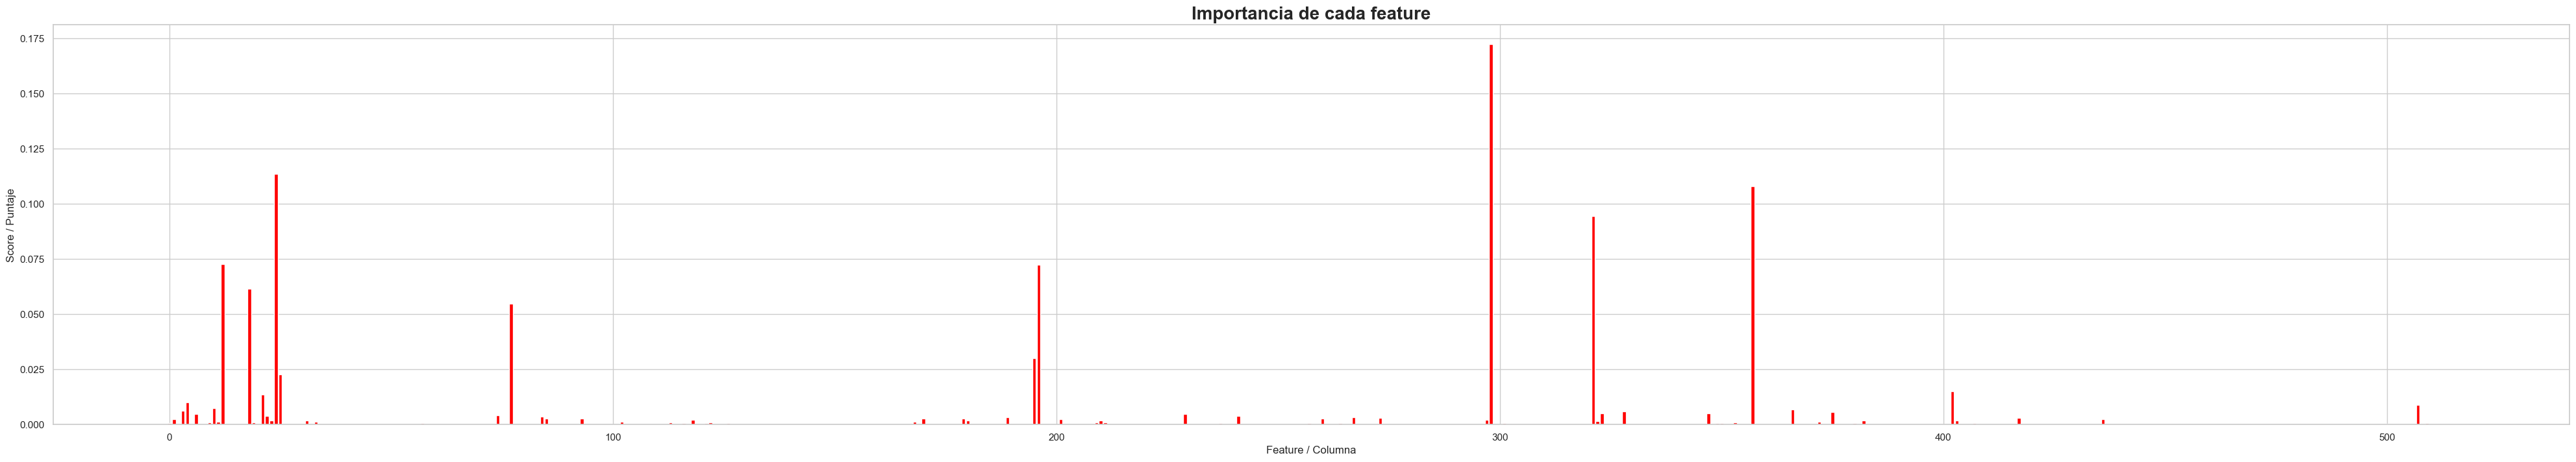

In [79]:
# plot feature importance
fig = plt.figure(figsize = (50, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

In [80]:
parametros_ordenados = pd.DataFrame.from_dict(puntajes_de_las_columnas, orient='index')
parametros_ordenados

,0
TransactionDT,0.00
TransactionAmt,0.00
card1,0.00
card2,0.01
card3,0.01
...,...
samsung,0.00
sm,0.00
trident,0.00
windows,0.00


In [81]:
parametros_ordenados = parametros_ordenados.reset_index()
parametros_ordenados

,index,0
0,TransactionDT,0.00
1,TransactionAmt,0.00
2,card1,0.00
3,card2,0.01
4,card3,0.01
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [82]:
parametros_ordenados.rename(columns={'index': 'parametro', parametros_ordenados.columns[1]: 'puntaje'},inplace=True)
parametros_ordenados

,parametro,puntaje
0,TransactionDT,0.00
1,TransactionAmt,0.00
2,card1,0.00
3,card2,0.01
4,card3,0.01
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [83]:
parametros_ordenados = parametros_ordenados.sort_values(by=['puntaje'])
parametros_ordenados

,parametro,puntaje
515,r16nw,0.00
294,V254,0.00
293,V253,0.00
292,V252,0.00
291,V251,0.00
...,...,...
12,C1,0.07
321,V281,0.09
357,V317,0.11
24,C13,0.11


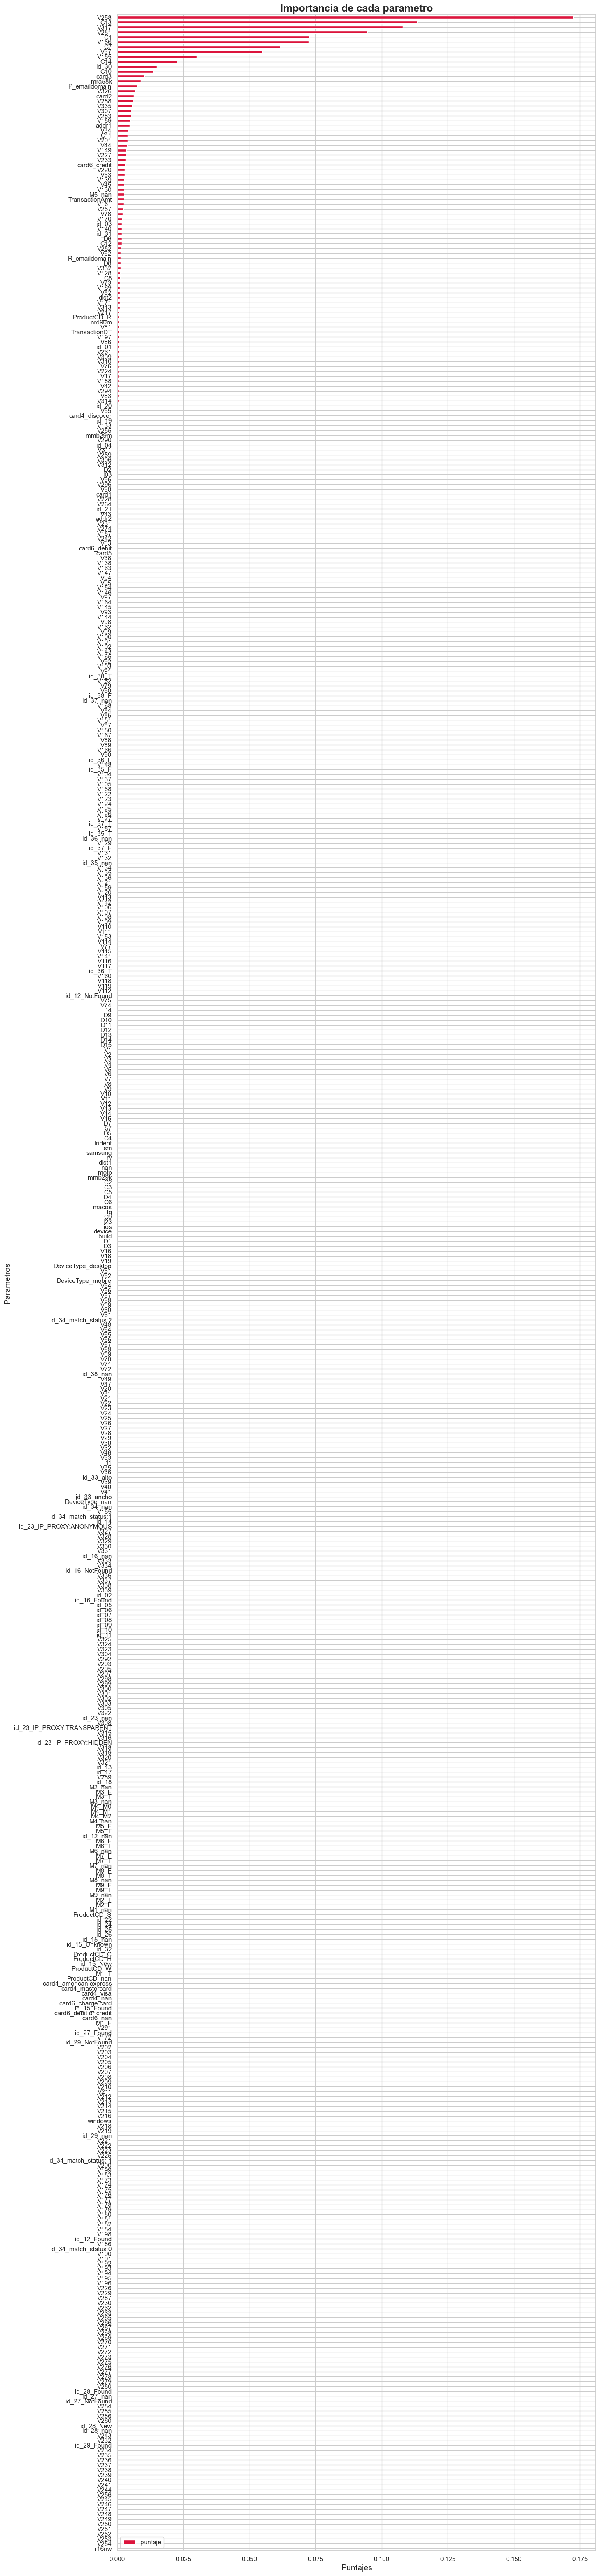

In [84]:
parametros_ordenados.plot.barh("parametro","puntaje",  rot = 0, color = 'crimson', figsize=(15,80))
plt.xlabel('Puntajes', size = 14)
plt.ylabel('Parametros', size = 14)
#plt.legend(("Importancia de cada parametro"),loc="lower right")
plt.title('Importancia de cada parametro', fontweight='bold', size = 18)
plt.show()

A partir de este gráfico se puede suponer que los parámetros más importantes son: V258, C13, V317, V281 y C1.

### Búsqueda de hiperparámetros

A partir de los resultados obtenidos en el otro archivo:

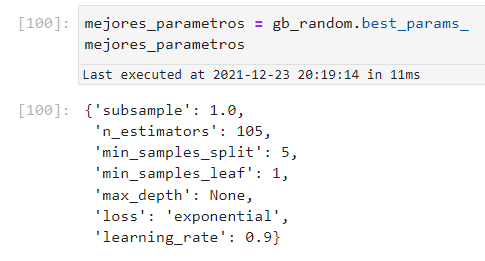

In [24]:
best_gboost = GradientBoostingClassifier(learning_rate=0.9, loss='exponential', max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=105, subsample=1.0, verbose=300, random_state=0)
best_gboost

GradientBoostingClassifier(learning_rate=0.9, loss='exponential',
                           max_depth=None, min_samples_split=5,
                           n_estimators=105, random_state=0, verbose=300)

In [25]:
best_gboost.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1518          599.31m
         2           0.0632          616.49m
         3           0.0264          604.53m
         4           0.0110          644.71m
         5           0.0046          670.52m
         6           0.0019          699.94m
         7           0.0008          723.77m
         8           0.0003          744.02m
         9           0.0001          764.81m
        10           0.0001          789.17m
        11           0.0000          799.85m
        12           0.0000          808.31m
        13           0.0000          817.20m
        14           0.0000          832.31m
        15           0.0000          855.79m
        16           0.0000          865.38m
        17           0.0000          877.43m
        18           0.0000          887.56m
        19           0.0000          897.18m
        20           0.0000          905.32m
        21           0.0000          893.24m
        2

GradientBoostingClassifier(learning_rate=0.9, loss='exponential',
                           max_depth=None, min_samples_split=5,
                           n_estimators=105, random_state=0, verbose=300)

In [26]:
preds_y_train = best_gboost.predict(X_train)

In [27]:
print(classification_report(y_train, preds_y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    366968
           1       1.00      1.00      1.00     13229

    accuracy                           1.00    380197
   macro avg       1.00      1.00      1.00    380197
weighted avg       1.00      1.00      1.00    380197



In [28]:
probas_y_train = best_gboost.predict_proba(X_train)[:,1]

In [29]:
roc_y_train = roc_auc_score(y_train, probas_y_train)
roc_y_train

1.0

In [30]:
preds_y_test = best_gboost.predict(X_test)

In [31]:
print(classification_report(y_test, preds_y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    157339
           1       0.89      0.55      0.68      5603

    accuracy                           0.98    162942
   macro avg       0.94      0.78      0.84    162942
weighted avg       0.98      0.98      0.98    162942



In [32]:
probas_y_test = best_gboost.predict_proba(X_test)[:,1]

In [33]:
roc_y_test = roc_auc_score(y_test, probas_y_test)
roc_y_test

0.9228163035103298

In [48]:
importance = best_gboost.feature_importances_
importance

array([5.57456977e-02, 3.43769765e-02, 3.27950009e-02, 3.38047793e-02,
       4.28806489e-03, 1.01618506e-02, 2.77420089e-02, 3.60637413e-04,
       1.20856210e-02, 2.82714136e-03, 1.30337234e-02, 9.41969935e-03,
       5.75112385e-02, 2.96448786e-03, 1.30644638e-07, 5.57195746e-04,
       2.32111513e-03, 8.39832429e-03, 2.25149846e-02, 4.86458443e-03,
       5.08934450e-03, 1.43387645e-03, 6.28811304e-03, 7.22227054e-03,
       2.59846745e-02, 2.29183899e-02, 6.39018416e-03, 1.10211864e-02,
       4.36727894e-03, 8.02837809e-03, 3.88394628e-03, 1.83476283e-03,
       7.85438534e-04, 5.52295897e-03, 1.81597828e-03, 6.93971138e-03,
       4.65482461e-03, 1.48308772e-03, 1.75168631e-03, 2.18266935e-03,
       1.15428911e-02, 9.17199337e-05, 7.69695496e-04, 7.27554490e-04,
       7.12996036e-04, 1.39705395e-03, 2.84731263e-04, 6.58586337e-04,
       4.52781389e-04, 9.00307684e-04, 2.07694408e-04, 2.38051994e-04,
       2.27786425e-03, 1.66081117e-03, 9.08830529e-07, 5.86332075e-06,
      

### Matriz de Confusion del best GradientBoostingClassifier

In [34]:
matrix = confusion_matrix(y_test, preds_y_test)
matrix

array([[156965,    374],
       [  2495,   3108]], dtype=int64)

Text(0.5, 1.0, 'Matriz de confusión para el GradientBoostingClassifier con los mejores parámetros')

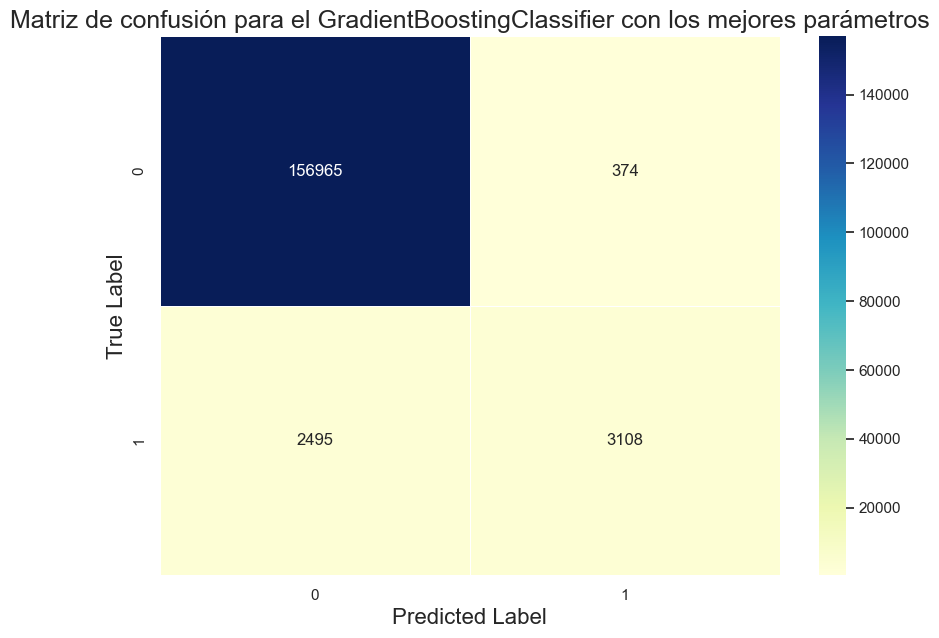

In [44]:
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (10,7))
s = sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g', linewidths=.5)
s.set_xlabel('Predicted Label', fontsize=16)
s.set_ylabel('True Label', fontsize=16)
s.set_title('Matriz de confusión para el GradientBoostingClassifier con los mejores parámetros', fontsize=18)

Con la matriz de confusión se puede ver que el modelo tiene pocos falsos positivos (es decir, casos que predije como fraude que que no eran) pero tiene muchos falsos negativos (es decir, casos que SI eran fraude y no los detecté) si lo comparamos con la cantidad de casos que efectivamente reconocimos como fraude.

### Pruebo el modelo 2 con mejores parametros en el de test

In [36]:
df_test = pd.read_csv("df_test_encoding_completo (4).csv")
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,...,0,0,1,0,0,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,...,0,0,1,0,0,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",...,0,0,1,0,0,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,...,0,0,1,0,0,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,...,0,0,1,0,0,0,0,0,0,0


In [37]:
df_test_resultados = df_test['TransactionID']
df_test_resultados.head()

0    3663549
1    3663550
2    3663551
3    3663552
4    3663553
Name: TransactionID, dtype: int64

In [38]:
df_test.drop(columns = ['TransactionID'], inplace = True)
df_test

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,0.00,...,0,0,1,0,0,0,0,0,0,0
2,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",0.00,...,0,0,1,0,0,0,0,0,0,0
3,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,0.00,...,0,0,1,0,0,0,0,0,0,0
4,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,0.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506687,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,157.00,...,0,0,0,0,0,0,0,0,0,0
506688,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506689,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0


In [40]:
valores_predecidos = best_gboost.predict_proba(df_test)
valores_predecidos

array([[1.00000000e+00, 9.97367211e-18],
       [9.99995511e-01, 4.48933253e-06],
       [1.00000000e+00, 2.08987902e-19],
       ...,
       [1.00000000e+00, 7.69677216e-17],
       [1.00000000e+00, 2.02375619e-16],
       [1.00000000e+00, 1.44826724e-18]])

In [41]:
lista_de_probas = []

for i in range(len(valores_predecidos)):
    lista_de_probas.append(valores_predecidos[i][1])

lista_de_probas

[9.973672112563892e-18,
 4.489332532011467e-06,
 2.0898790170504883e-19,
 2.0485996509588944e-18,
 3.672913057676457e-10,
 1.662306637161579e-20,
 5.613366674232545e-18,
 5.4465617884901313e-14,
 6.890367788713958e-20,
 1.1823275799242645e-16,
 1.639377359426532e-14,
 2.420808273918873e-18,
 1.6885271826112157e-15,
 3.049711476457475e-19,
 1.0061536594246318e-16,
 6.889556615421458e-16,
 2.9947626251184447e-16,
 6.212747126436721e-12,
 1.4639221596440487e-08,
 3.3638480748457197e-15,
 6.88149231491485e-17,
 6.885170222453007e-20,
 3.2656987753649578e-18,
 1.7809674898286383e-07,
 4.581259489966678e-07,
 6.573953573797566e-05,
 9.942331050785758e-11,
 1.2719041791940073e-13,
 1.3189795396355222e-06,
 1.0802963736548839e-13,
 0.006076955590448722,
 8.521168304889215e-15,
 0.006076955590448722,
 7.389540756740744e-18,
 2.1669694925801122e-19,
 2.99337184711218e-19,
 8.770646370325605e-18,
 1.502362260079321e-05,
 1.094215981878728e-11,
 9.073118534531158e-16,
 4.826536257343159e-06,
 3.58

In [42]:
submit = pd.concat([df_test_resultados, pd.Series(lista_de_probas, name='isFraud')], axis=1)
submit.set_index('TransactionID', inplace=True)
submit.head()

,isFraud
TransactionID,
3663549,0.00
3663550,0.00
3663551,0.00
3663552,0.00
3663553,0.00


In [60]:
submit.to_csv('submit_gboost_best_params.csv', index = True)

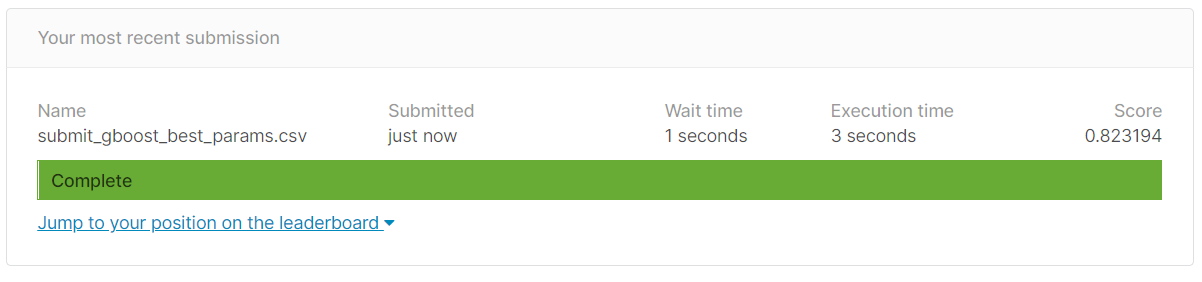

### Parámetros más importantes

In [49]:
len(importance)

516

In [50]:
puntajes_de_las_columnas = {}
count = 1

# summarize feature importance
for i,v in enumerate(importance):
    print(count, ' - Columna', columnas_sin_isFraud_y_sin_TransactionID[i], '  -  Score: %.5f' % (v))
    #puntajes_de_las_columnas.append((columnas_sin_isFraud_y_sin_TransactionID[i], v))
    #puntajes_de_las_columnas.update({v: columnas_sin_isFraud_y_sin_TransactionID[i]})
    puntajes_de_las_columnas.update({columnas_sin_isFraud_y_sin_TransactionID[i] : v})
    
    count = count+1

1  - Columna TransactionDT   -  Score: 0.05575
2  - Columna TransactionAmt   -  Score: 0.03438
3  - Columna card1   -  Score: 0.03280
4  - Columna card2   -  Score: 0.03380
5  - Columna card3   -  Score: 0.00429
6  - Columna card5   -  Score: 0.01016
7  - Columna addr1   -  Score: 0.02774
8  - Columna addr2   -  Score: 0.00036
9  - Columna dist1   -  Score: 0.01209
10  - Columna dist2   -  Score: 0.00283
11  - Columna P_emaildomain   -  Score: 0.01303
12  - Columna R_emaildomain   -  Score: 0.00942
13  - Columna C1   -  Score: 0.05751
14  - Columna C2   -  Score: 0.00296
15  - Columna C3   -  Score: 0.00000
16  - Columna C4   -  Score: 0.00056
17  - Columna C5   -  Score: 0.00232
18  - Columna C6   -  Score: 0.00840
19  - Columna C7   -  Score: 0.02251
20  - Columna C8   -  Score: 0.00486
21  - Columna C9   -  Score: 0.00509
22  - Columna C10   -  Score: 0.00143
23  - Columna C11   -  Score: 0.00629
24  - Columna C12   -  Score: 0.00722
25  - Columna C13   -  Score: 0.02598
26  - Colum

In [51]:
puntajes_de_las_columnas

{'TransactionDT': 0.05574569773840784,
 'TransactionAmt': 0.03437697648193495,
 'card1': 0.03279500087143933,
 'card2': 0.03380477932990947,
 'card3': 0.004288064892720751,
 'card5': 0.01016185058004596,
 'addr1': 0.027742008920528482,
 'addr2': 0.0003606374127638898,
 'dist1': 0.012085621017614484,
 'dist2': 0.002827141355764756,
 'P_emaildomain': 0.013033723365424448,
 'R_emaildomain': 0.009419699348047263,
 'C1': 0.0575112384733098,
 'C2': 0.0029644878594667894,
 'C3': 1.3064463794692529e-07,
 'C4': 0.0005571957456346629,
 'C5': 0.00232111512842667,
 'C6': 0.008398324290469548,
 'C7': 0.02251498456863157,
 'C8': 0.004864584426973523,
 'C9': 0.005089344497317841,
 'C10': 0.0014338764523698618,
 'C11': 0.0062881130360000585,
 'C12': 0.007222270543003016,
 'C13': 0.025984674517757773,
 'C14': 0.02291838988584223,
 'D1': 0.006390184159733786,
 'D2': 0.01102118640506591,
 'D3': 0.004367278937233156,
 'D4': 0.008028378093680228,
 'D5': 0.0038839462838979677,
 'D6': 0.0018347628324156796,


In [52]:
len(puntajes_de_las_columnas.keys())

516

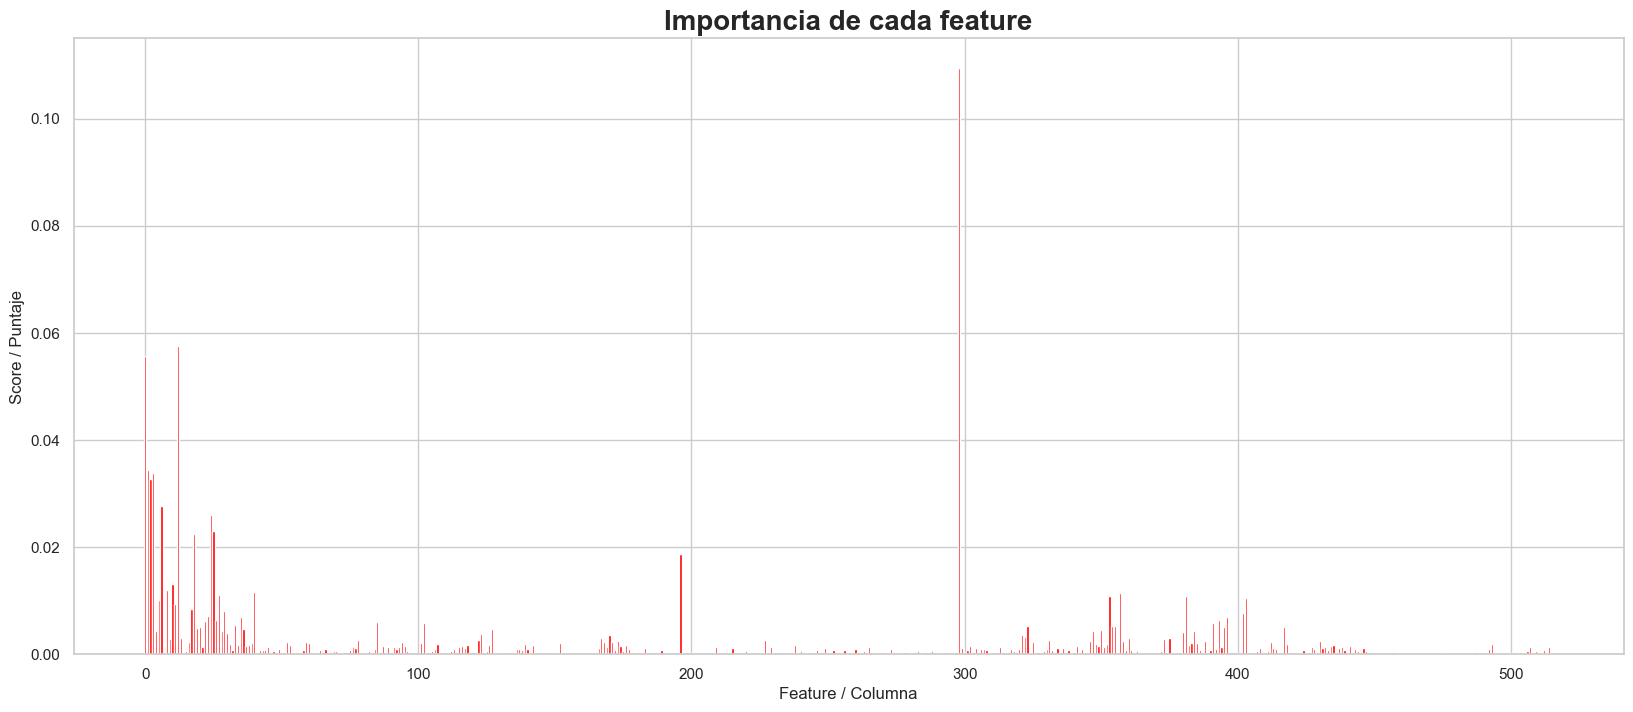

In [53]:
# plot feature importance
fig = plt.figure(figsize = (20, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

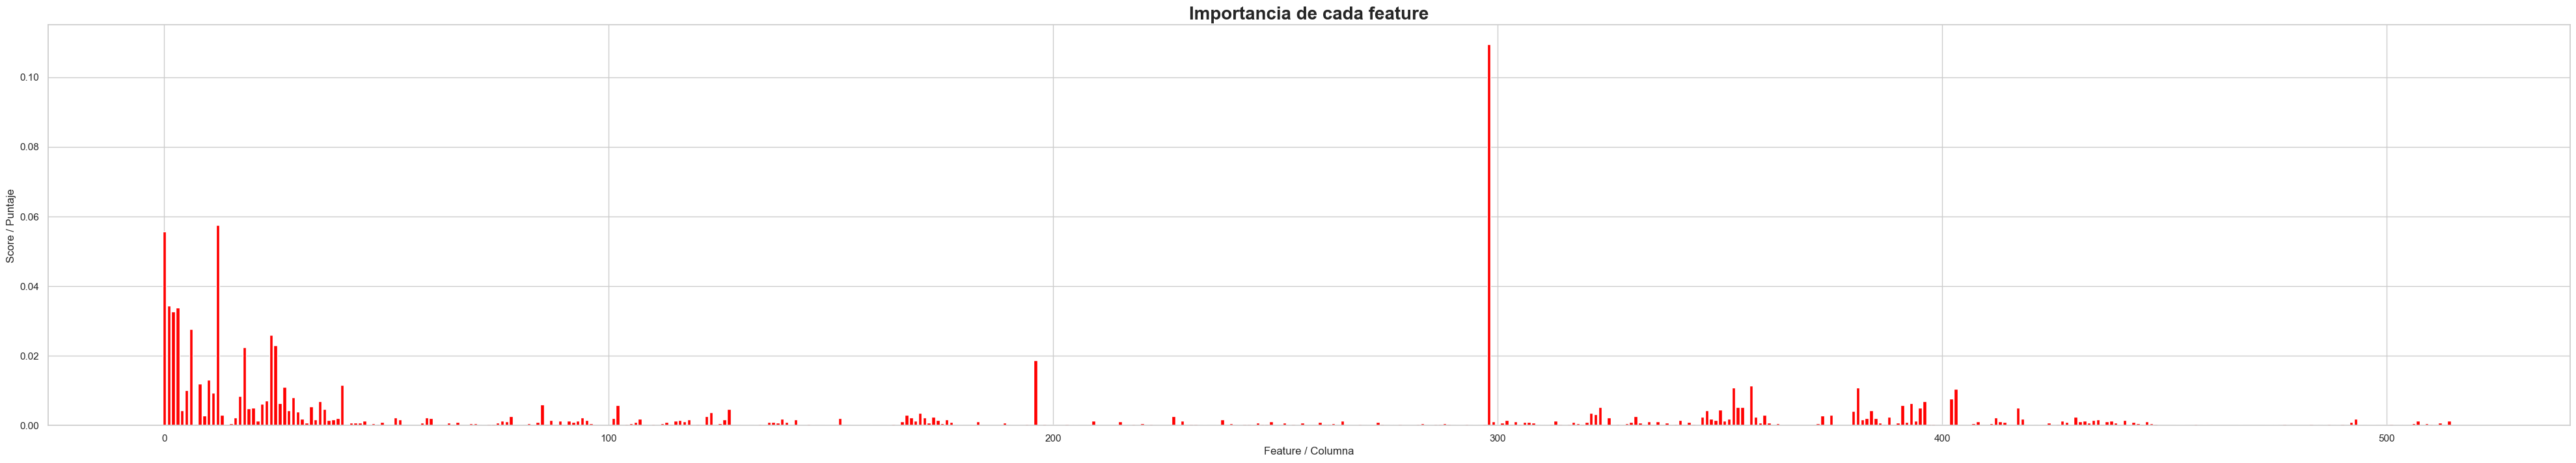

In [54]:
# plot feature importance
fig = plt.figure(figsize = (50, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

In [55]:
parametros_ordenados = pd.DataFrame.from_dict(puntajes_de_las_columnas, orient='index')
parametros_ordenados

,0
TransactionDT,0.06
TransactionAmt,0.03
card1,0.03
card2,0.03
card3,0.00
...,...
samsung,0.00
sm,0.00
trident,0.00
windows,0.00


In [56]:
parametros_ordenados = parametros_ordenados.reset_index()
parametros_ordenados

,index,0
0,TransactionDT,0.06
1,TransactionAmt,0.03
2,card1,0.03
3,card2,0.03
4,card3,0.00
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [57]:
parametros_ordenados.rename(columns={'index': 'parametro', parametros_ordenados.columns[1]: 'puntaje'},inplace=True)
parametros_ordenados

,parametro,puntaje
0,TransactionDT,0.06
1,TransactionAmt,0.03
2,card1,0.03
3,card2,0.03
4,card3,0.00
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [58]:
parametros_ordenados = parametros_ordenados.sort_values(by=['puntaje'])
parametros_ordenados

,parametro,puntaje
515,r16nw,0.00
410,ProductCD_nan,0.00
464,id_27_NotFound,0.00
472,id_34_match_status:-1,0.00
345,V305,0.00
...,...,...
3,card2,0.03
1,TransactionAmt,0.03
0,TransactionDT,0.06
12,C1,0.06


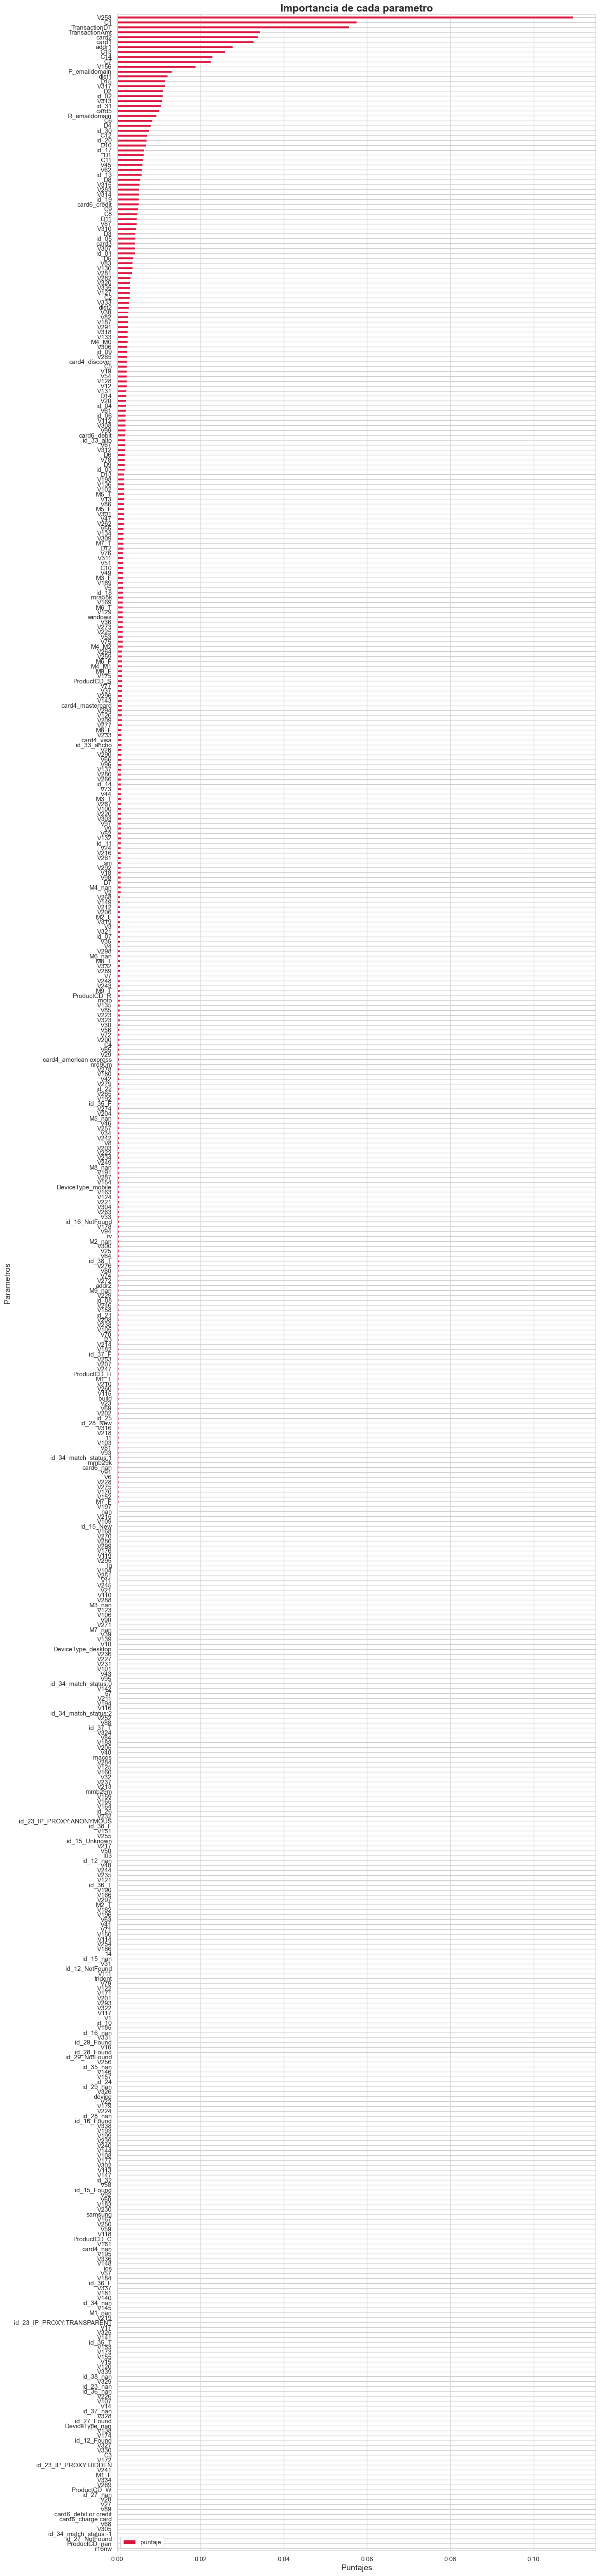

In [59]:
parametros_ordenados.plot.barh("parametro","puntaje",  rot = 0, color = 'crimson', figsize=(15,80))
plt.xlabel('Puntajes', size = 14)
plt.ylabel('Parametros', size = 14)
#plt.legend(("Importancia de cada parametro"),loc="lower right")
plt.title('Importancia de cada parametro', fontweight='bold', size = 18)
plt.show()

A partir de este gráfico se puede suponer que los parámetros más importantes son: V258, C1, TransactionDT, TransactionAmt y card2.

### Grafico del best Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import numpy as np

# Get the tree number 5
sub_tree_5 = best_gboost.estimators_[5, 0]

export_graphviz(
    sub_tree_5,
    out_file='gboost.dot', 
    filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)